## GARCH Implementation (Volatility Modelling)

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('./data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Preprocessing

In [20]:
# Converting Date Column to DataTime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [21]:
# Setting Datatime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [22]:
# Calculating log returns (Log Transformation)
import numpy as np

dt['Log_Returns'] = np.log(dt['Adj Close'] / dt['Adj Close'].shift(1))
dt.dropna(inplace=True)

In [23]:
dt

,Open,High,Low,Close,Adj Close,Volume,Log_Returns
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.005360
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.011041
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.010399
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.001587
2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100,0.003574
...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,0.016187
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,0.000950
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,0.019646
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,-0.000380


In [24]:
# Splitting data into training and test sets
train_size = int(len(dt) * 0.8)
train, test = dt['Log_Returns'][:train_size], dt['Log_Returns'][train_size:]

### Building Model

In [25]:
from arch import arch_model

# Initializing Model
model = arch_model(train, vol='Garch', p=8, q=1)

# Fitting Model
garch_fit = model.fit(disp='off')

# Model Summary
garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4454.03
Distribution:                  Normal   AIC:                          -8886.06
Method:            Maximum Likelihood   BIC:                          -8826.85
                                        No. Observations:                 1608
Date:                Sat, Jul 13 2024   Df Residuals:                     1607
Time:                        20:20:41   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5571e-03  5.661e-04      2.751  5.949e-03 [4.476e-04,2.667e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.2944e-04  1.211e-04      1.069      0.285 [-1.080e-04,3.669e-04]
alpha[1]       0.1874  6.853e-02      2.734  6.260e-03    [5.304e-02,  0.322]
alpha[2]       0.0556      0.164      0.340      0.734      [ -0.265,  0.376]
alpha[3]       0.0674  8.641e-02      0.781      0.435      [ -0.102,  0.237]
alpha[4]       0.0000      0.287      0.000      1.000      [ -0.563,  0.563]
alpha[5]   1.8944e-12  8.589e-02  2.206e-11      1.000      [ -0.168,  0.168]
alpha[6]       0.0522      0.159      0.328      0.743      [ -0.259,  0.364]
alpha[7]       0.1104      0.103      1.072      0.284   [-9.144e-02,  0.312]
alpha[8]       0.0460      0.120      0.383      0.702      [ -0.189,  0.281]
beta[1]        0.0000      0.873      0.000      1.000      [ -1.712,  1.712]
=============================================================================

Covariance estimator: robust
"""

#### Making Predictions

In [26]:
# Forecasting Volatility
forecast_horizon = int(len(test))
garch_forecast = garch_fit.forecast(
    horizon= forecast_horizon
)

# Extracting the forecasted volatitlity (standard deviation)
predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])

#### Evaluating Model

In [27]:
# Calculating mean squared error of the forcasted volatitlity
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test.values, predicted_volatitlity)
print(f'Mean Squared Error of Garch Model: {mse}')

Mean Squared Error of Garch Model: 0.0005413522721557196


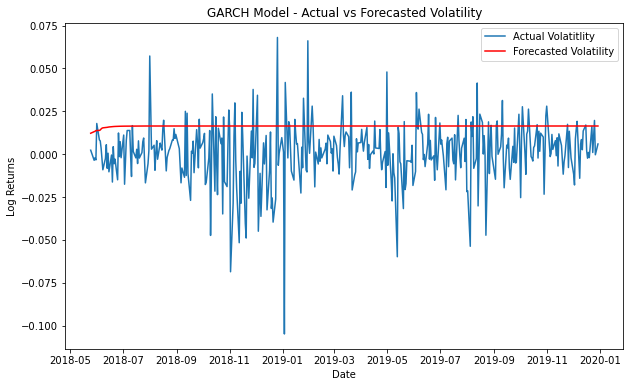

In [28]:
# Plotting the actual vs forecasted volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label = 'Actual Volatitlity')
plt.plot(test.index, predicted_volatitlity, label = 'Forecasted Volatility', color='red')
plt.title('GARCH Model - Actual vs Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [29]:
# Initializing a list to store the results
results = []

# Grid Search
for p in range(1, 10):
    for q in range(1, 10):
        try:
            # Fitting Model
            model = arch_model(train, vol='Garch', p=p, q=q)
            garch_fit = model.fit(disp='off')
            aic = garch_fit.aic
            bic = garch_fit.bic

            # Forecasting
            forecast_horizon = int(len(test))
            garch_forecast = garch_fit.forecast(horizon= forecast_horizon)

            # Extracting the forecasted volatitlity (standard deviation)
            predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])
            
            # Calculating mse
            mse = mean_squared_error(test.values, predicted_volatitlity)

            # Saving results
            results.append((p, q, aic, bic, mse))
        except:
            continue

# Converting results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'BIC', 'MSE'])

In [30]:
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

# print(f'Best p, q based on AIC: \nP = {best_aic.p} \nQ = {best_aic.q} \nAIC = {best_aic.AIC}')
# print(f'\nBest p, q based on BIC: \nP = {best_bic.p} \nQ = {best_bic.q} \nAIC = {best_bic.AIC}')

if best_aic.MSE < best_bic.MSE:
    print(f'Best overall parameter based on least MSE between AIC and BIC: \n{best_aic}')
    best_param = best_aic
else:
    print(f'Best overall parameter based on least MSE between AIC and BIC: \n{best_bic}')
    best_param = best_bic

Best overall parameter based on least MSE between AIC and BIC: 
p         1.000000
q         1.000000
AIC   -8873.826414
BIC   -8852.295428
MSE       0.000522
Name: 0, dtype: float64


The hyperparameter tuning process identified the best parameters for the GARCH model using gridh search. The models with the lowest AIC and BIC were evaluated and compared based on their mean squared error (MSE).

#### Training Model based on best parameters

In [31]:
# Fitting model
best_model = arch_model(dt['Log_Returns'], vol='Garch', p=int(best_param.p), q=int(best_param.q))
best_garch_fit = best_model.fit(disp='off')

# Forecasting values
forecast_horizon = 90
garch_forecast = best_garch_fit.forecast(horizon=forecast_horizon)

# Extracting the forecasted volatitlity (standard deviation)
predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])

#### Plotting Forecast

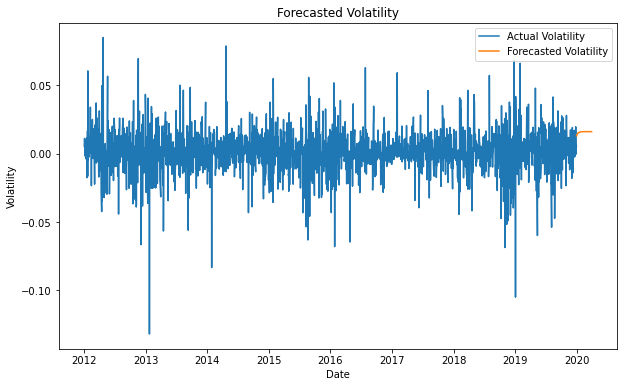

In [32]:
# Plotting forecast

forecast_ind = pd.date_range(
    start= dt.index[-1] + pd.Timedelta(days=1),
    periods=forecast_horizon,
    freq='D'
)

plt.figure(figsize=(10, 6))
plt.plot(dt.index, dt['Log_Returns'], label='Actual Volatility')
plt.plot(forecast_ind, predicted_volatitlity, label='Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Forecasted Volatility')
plt.legend()
plt.show()